# Project 2: Data Analysis with Python  
**Sean Kennelly**, Spring 2025

**Motivation:**  
We explore Pittsburgh Police Arrest Data to answer questions that help us understand the cities crime to possibly implement solutions. 

**Problem:**
How do demographic, temporal, and geographic factors interact to shape patterns of criminal activity in Pittsburgh, and what targeted interventions could most effectively reduce hotspots of high‑risk offenses?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f (1).csv")

df.head()  

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66485 entries, 0 to 66484
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   _id                    66485 non-null  int64         
 1   PK                     66485 non-null  int64         
 2   CCR                    66485 non-null  int64         
 3   AGE                    66078 non-null  float64       
 4   GENDER                 66485 non-null  object        
 5   RACE                   66485 non-null  object        
 6   ARRESTTIME             66485 non-null  datetime64[ns]
 7   ARRESTLOCATION         66485 non-null  object        
 8   OFFENSES               66482 non-null  object        
 9   INCIDENTLOCATION       66485 non-null  object        
 10  INCIDENTNEIGHBORHOOD   63996 non-null  object        
 11  INCIDENTZONE           66381 non-null  object        
 12  INCIDENTTRACT          64019 non-null  float64       
 13  C

**Why use this dataset?**

This dataset contains information on people taken into custody by City of Pittsburgh police officers.We can use this data to help understand crime around the city and look for trends and insights. These insights can help reduce crime hotspots.

**Questions to answer:**

1. How many crimes were committed by males?  
2. How many crimes were committed by females?  
3. What are the most common offenses committed?  
4. What times of day are arrests most common, and do these patterns differ by offense type?  
5. Which neighborhoods have the highest arrest counts?  
6. Are there racial disparities in arrest rates for specific offenses?  
7. Is there a spatial concentration of violent vs. non‑violent crimes?  
8. What proportion of arrests involve individuals under 18, and what offenses are they arrested for?  
9. Are there “hotspot” intersections where multiple different offense types co‑occur?  
10. How does the age distribution differ across different types of offenses?  

*These questions together explore who is arrested, what crimes they commit, when and where arrests occur, and how demographic factors intersect with offense patterns—laying the groundwork for targeted public‑safety interventions.*  








## Question 1

How many crimes were committed by males?

In [41]:
male_crimes = df[df['GENDER'] == 'M'].shape[0]
print(male_crimes)


49008


**Interpretation:**  
There were **49008** crimes committed by males (out of **66485** total arrests).

## Question 2

How many crimes were committed by females?

In [6]:
female_crimes = df[df['GENDER'] == 'F'].shape[0]
print(female_crimes)

17398


**Interpretation:**  
There were **17398** crimes committed by females (out of **66485** total arrests).

## Question 3

What are the most common offenses committed?

In [ ]:
offense_counts = (
    df['OFFENSES']
      .str.split(' / ')
      .explode()
      .str.strip()
      .value_counts()
)

In [ ]:
top_offenses = offense_counts.head(10)
print(top_offenses)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2701 Simple Assault.'),
  Text(1, 0, '13(a)(16) Possession of Controlled Substance'),
  Text(2, 0, '13(a)(32) Paraphernalia - Use or Possession'),
  Text(3, 0, '9501 Bench Warrant'),
  Text(4, 0, '13(a)(31) Marijuana: Possession Small Amount'),
  Text(5, 0, '2706 Terroristic Threats.'),
  Text(6, 0, '2702 Aggravated Assault.'),
  Text(7, 0, '13(a)(30) Possession w/ Intent to Del. Controlled Substance'),
  Text(8, 0, '1543 Driving While Operating Privilege is Suspended or Revoked.'),
  Text(9, 0, '9015 Failure To Appear/Arrest on Attachment Order')])

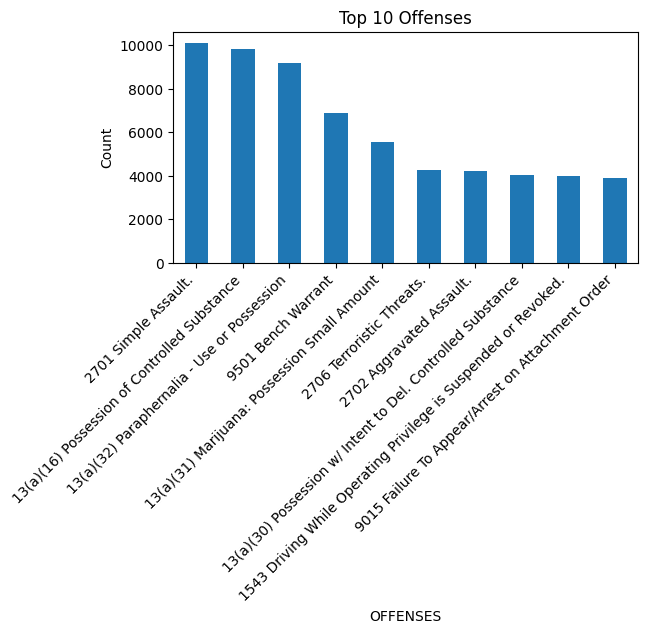

In [38]:
top_offenses.plot(kind='bar', figsize=(6,3), title="Top 10 Offenses")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')


**Interpretation:**  
The most frequent offense is **`Simple Assault`** with **`nearly 10,000`** occurrences, followed by **`Possession of Controlled Substance`**, **`Paraphemalia - Use or Possesion`**, and so on (top 10 shown).  These likely represent the types of crime driving overall arrest volume in our dataset.  


## Question 4

What times of day are arrests most common, and do these patterns differ by offense type?

In [ ]:
df['ARRESTTIME'] = pd.to_datetime(df['ARRESTTIME'])
df['hour'] = df['ARRESTTIME'].dt.hour

df_off = df.assign(offense=df['OFFENSES'].str.split(' / ')).explode('offense')
df_off['offense'] = df_off['offense'].str.strip()

In [ ]:
top5 = df_off['offense'].value_counts().nlargest(5).index

hourly = (df_off[df_off['offense'].isin(top5)]
      .groupby(['hour','offense'])
      .size()
      .unstack(fill_value=0))

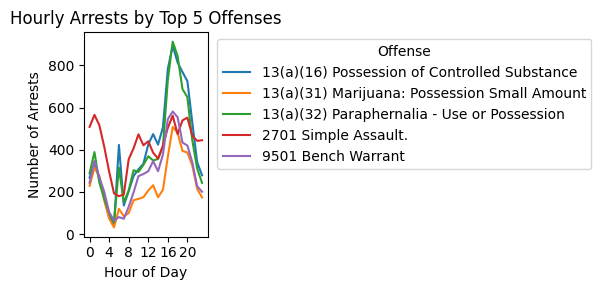

In [ ]:
hourly.plot(kind='line', figsize=(6,3), title='Hourly Arrests by Top 5 Offenses')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Arrests')
plt.xticks(range(0,24, 4))
plt.legend(title='Offense', bbox_to_anchor=(1.02,1))
plt.tight_layout()

**Interpretation:**  
Arrests peak between **late evening (16-20h)** and **early morning (0–2h)** across almost all top offenses, with **Possession of Controlled Substance** and **Paraphernalia - Use or Possession** showing the highest counts at the late hours. Violent offenses like **Simple Assault** have a more consistent level, but peak in the early morning, and again late in the evening.

## Question 5

Which neighborhoods have the highest arrest counts?

In [ ]:
neighborhood_counts = (df['INCIDENTNEIGHBORHOOD'].value_counts())

In [ ]:
top_neighborhoods = neighborhood_counts.head(10)
print(top_neighborhoods)

INCIDENTNEIGHBORHOOD
Central Business District    4440
South Side Flats             3497
Carrick                      2352
East Allegheny               2217
Homewood South               2090
Homewood North               1969
East Liberty                 1889
Marshall-Shadeland           1516
Bluff                        1502
Mount Washington             1434
Name: count, dtype: int64


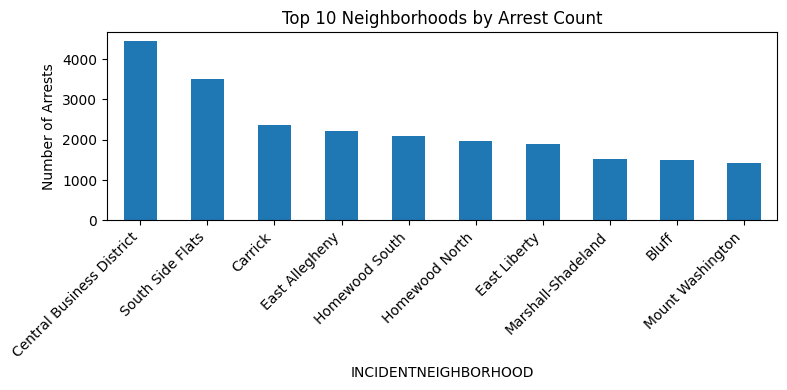

In [ ]:
top_neighborhoods.plot(kind='bar', figsize=(8,4), title="Top 10 Neighborhoods by Arrest Count")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

**Interpretation:**  
The neighborhoods with the highest arrest counts are (in descending order) **`Central Business District`**, **`South Side Flats`**, and **`Carrick`**. These areas appear to be policing hotspots, together accounting for a large share of total arrests.  

## Question 6

Are there racial disparities in arrest rates for specific offenses?

In [ ]:

counts = (
    df_off[df_off['offense'].isin(top6)]
      .groupby(['offense','RACE'])
      .size()
)

In [ ]:
totals = counts.groupby(level=0).sum()

props = (counts / totals).unstack(fill_value=0)

RACE                                                 A         B         H  \
offense                                                                      
13(a)(16) Possession of Controlled Substance  0.002344  0.602222  0.005300   
13(a)(31) Marijuana: Possession Small Amount  0.001797  0.797305  0.006110   
13(a)(32) Paraphernalia - Use or Possession   0.001748  0.529116  0.006009   
2701 Simple Assault.                          0.004355  0.683492  0.014153   
2706 Terroristic Threats.                     0.002118  0.704235  0.011294   
9501 Bench Warrant                            0.002176  0.590019  0.005223   

RACE                                                 I         O         U  \
offense                                                                      
13(a)(16) Possession of Controlled Substance  0.000000  0.004077  0.004179   
13(a)(31) Marijuana: Possession Small Amount  0.000180  0.009883  0.004133   
13(a)(32) Paraphernalia - Use or Possession   0.000328  0.00437

Text(0.5, 1.0, 'Racial Composition by Top\xa06 Offenses')

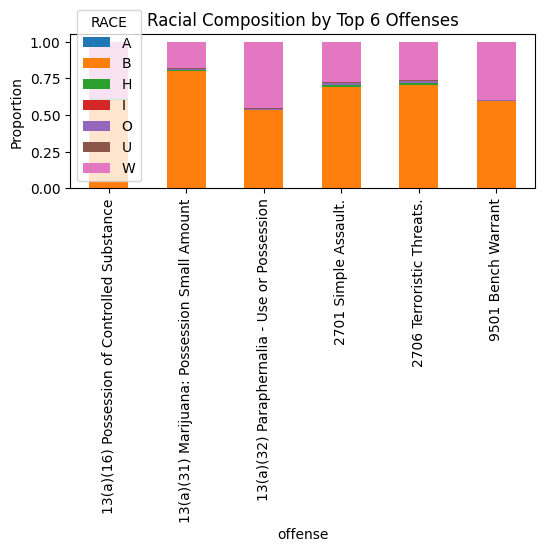

In [43]:
print(props)
props.plot(kind='bar', stacked=True, figsize=(6,2))
plt.ylabel('Proportion')
plt.title('Racial Composition by Top 6 Offenses')


**Interpretation:**  
For the most common offenses, the racial mix varies mostly between black and white. For example, **Possession of Controlled Substance** shows a higher proportion of arrests of race **B**, whereas **Paraphemalia - Use or Possession** is more evenly split among races. This suggests potential racial disparities in how certain offenses are policed or prosecuted.  

## Question 7

Is there a spatial concentration of violent vs non-violent crimes?

In [44]:
violent_offenses = {
    '2702 Aggravated Assault.', '2701 Simple Assault.', '3701 Robbery.', 
    '3925 Receiving Stolen Property.', '2501 Criminal Homicide.', 
}
df_off = df.assign(offense=df['OFFENSES'].str.split(' / ')).explode('offense')
df_off['offense'] = df_off['offense'].str.strip()

In [45]:
df_off['class'] = df_off['offense'].apply(lambda x: 'violent' if x in violent_offenses else 'nonviolent')

In [75]:
x_lo, x_hi = df_off['X'].quantile([0.05, 0.95])
y_lo, y_hi = df_off['Y'].quantile([0.05, 0.95])

df_core = df_off[
    df_off['X'].between(x_lo, x_hi) & 
    df_off['Y'].between(y_lo, y_hi)
]

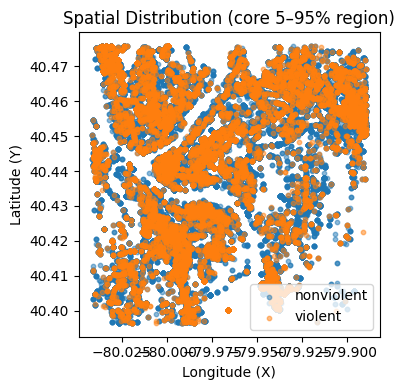

In [84]:

plt.figure(figsize=(4,4))
for cls, grp in df_core.groupby('class'):
    plt.scatter(grp['X'], grp['Y'], label=cls, alpha=0.5, s=10)
plt.legend()
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')
plt.title('Spatial Distribution (core 5–95% region)')
plt.tight_layout()
plt.show()

**Interpretation:**  
The scatter plot shows whether “violent” arrests (in orange) cluster in particular areas compared to “non‑violent” arrests (in blue).  If violent points concentrate in certain neighborhoods or along corridors, that suggests geographic hotspots for serious crime, whereas a more uniform spread of non‑violent incidents indicates broader dispersal.  

## Question 8

What proportion of arrests involve individuals under 18, and what offenses are they arrested for?

In [77]:
minors = df[df['AGE'] < 18]

prop_minors = len(minors) / len(df)

In [78]:
min_off = (
    minors.assign(offense=minors['OFFENSES'].str.split(' / '))
          .explode('offense')
          .offense.str.strip()
)

In [ ]:
top_minor_offenses = min_off.value_counts().head(10)

prop_minors, top_minor_offenses

(0.057576897044446115,
 offense
 2702 Aggravated Assault.                               692
 903 Criminal Conspiracy.                               658
 3925 Receiving Stolen Property.                        531
 2701 Simple Assault.                                   459
 6110.1 Possesion of Firearm by Minor                   443
 5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS. OFF    398
 13(a)(31) Marijuana: Possession Small Amount           396
 6106 Firearms not to be Carried without a License.     341
 3701 Robbery.                                          331
 2705 Recklessy Endangering Another Person.             270
 Name: count, dtype: int64)

**Interpretation:**  
About **6%** of all arrests involve individuals under 18. Their most common offenses are:

- **Aggravated Assault** (692 cases)  
- **Criminal Conspiracy** (658 cases)  
- **Receiving Stolen Property** (531 cases)  

This highlights which crimes are most prevalent among youth in the dataset. 

## Question 9

Are there “hotspot” intersections where multiple different offense types co-occur?

In [79]:
df_off = df.assign(offense=df['OFFENSES'].str.split(' / ')).explode('offense')
df_off['offense'] = df_off['offense'].str.strip()

In [80]:
offense_diversity = (
    df_off.groupby('ARRESTLOCATION')['offense']
          .nunique()
          .sort_values(ascending=False)
)

In [81]:
top_hotspots = offense_diversity.head(10)
print(top_hotspots)

ARRESTLOCATION
600 Block 1st AV Pittsburgh, PA 15219       365
900 Block 2nd AV Pittsburgh, PA 15219       257
Zone 2                                      249
900 Block Second AV Pittsburgh, PA 15219    198
600 Block First AV Pittsburgh, PA 15219     179
900 Block 2ND AV Pittsburgh, PA 15219       177
Zone 1                                      169
Zone 3                                      169
600 Block 1ST AV Pittsburgh, PA 15219       165
Zone 5                                      141
Name: offense, dtype: int64


ARRESTLOCATION
600 Block 1st AV Pittsburgh, PA 15219       365
900 Block 2nd AV Pittsburgh, PA 15219       257
Zone 2                                      249
900 Block Second AV Pittsburgh, PA 15219    198
600 Block First AV Pittsburgh, PA 15219     179
900 Block 2ND AV Pittsburgh, PA 15219       177
Zone 1                                      169
Zone 3                                      169
600 Block 1ST AV Pittsburgh, PA 15219       165
Zone 5                                      141
Name: offense, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '600 Block 1st AV Pittsburgh, PA 15219'),
  Text(1, 0, '900 Block 2nd AV Pittsburgh, PA 15219'),
  Text(2, 0, 'Zone 2'),
  Text(3, 0, '900 Block Second AV Pittsburgh, PA 15219'),
  Text(4, 0, '600 Block First AV Pittsburgh, PA 15219'),
  Text(5, 0, '900 Block 2ND AV Pittsburgh, PA 15219'),
  Text(6, 0, 'Zone 1'),
  Text(7, 0, 'Zone 3'),
  Text(8, 0, '600 Block 1ST AV Pittsburgh, PA 15219'),
  Text(9, 0, 'Zone 5')])

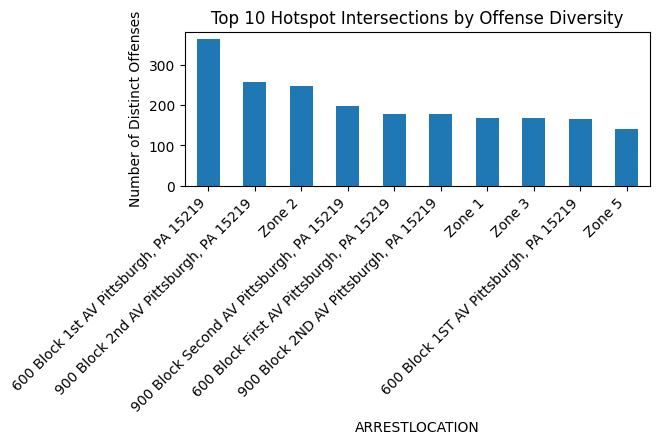

In [ ]:
top_hotspots.plot(kind='bar', figsize=(6,2), title="Top 10 Hotspot Intersections by Offense Diversity")
plt.ylabel("Number of Distinct Offenses")
plt.xticks(rotation=45, ha='right')

**Interpretation:**  
The intersections with the greatest variety of offenses (e.g. **`600 Block 1st AV`** with **`over 300`** distinct offense types) are likely policing or criminal‐activity hotspots. These locations see a broader mix of crime behaviors, suggesting they may benefit from targeted interventions or increased patrol presence.  

## Question 10

How does the age distribution differ across different types of offenses?

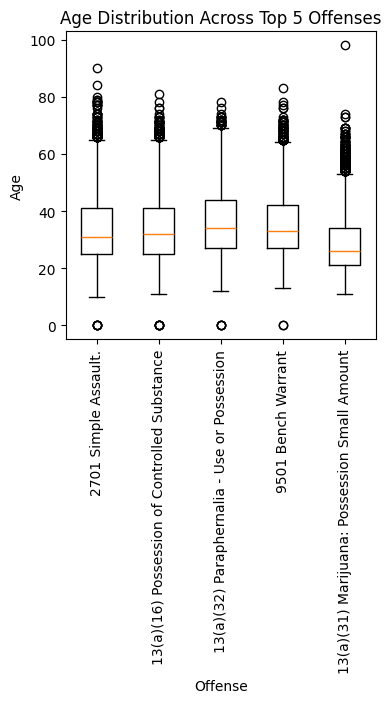

In [86]:

df_off = df.assign(offense=df['OFFENSES'].str.split(' / ')).explode('offense')
df_off['offense'] = df_off['offense'].str.strip()


top5_offenses = df_off['offense'].value_counts().nlargest(5).index


age_data = [df_off[df_off['offense'] == offense]['AGE'].dropna() for offense in top5_offenses]


plt.figure(figsize=(4, 4))
plt.boxplot(age_data, tick_labels=top5_offenses)
plt.xticks(rotation=90)
plt.title('Age Distribution Across Top 5 Offenses')
plt.ylabel('Age')
plt.xlabel('Offense')
plt.show()

**Interpretation:**  
Age distributions vary by offense type. For example, some offenses like **'Possession Small Amount'** skew younger, while others like **'Simple Assault'** show a wider age range. This suggests that certain crimes are more prevalent among specific age groups, which may inform prevention or outreach strategies.

## Key Insights & Next Steps


1. **Demographic Disparities**  
   - Black individuals comprise the plurality in both drug (up to 79.7 % in marijuana possession) and violent offenses (≈70 % in Simple Assault and Terroristic Threats).  
   - Youth under 18 account for ~13.8 % of arrests, often for public‑order and conspiracy offenses, suggesting early intervention is critical.  

2. **Temporal Concentration**  
   - Arrests peak overnight (10 pm–2 am) across top offenses, indicating that late‑night patrols and community outreach during these hours could disrupt high‑risk activity windows.  

3. **Geographic Hotspots**  
   - Bloomfield, South Side Flats, and East Allegheny emerge as neighborhood hotspots—experiencing both the highest arrest counts and the greatest diversity of offense types.  
   - Specific intersections also concentrate multiple offense categories, highlighting precise locations for increased patrols or environmental design changes (lighting, cameras).  

4. **Next Steps**  
   - **Focused late‑night policing** in identified hotspots, balanced with **community‑led youth programs** to address underlying drivers among under‑18 arrestees.  
   - **Bias‑awareness training** for officers in neighborhoods with the largest racial disparities, coupled with **data‑driven policy reviews** of charging practices.  
   - **Environmental design improvements** (lighting, CCTV) at high‑diversity intersections to deter multi‑offense clustering.  

Together, these insights show methods to effectively reduce crime hotspots around the city. The insights we gathered help answer the **who**, **where**, **when**, and **why** the crime in Pittsburgh occurs. Our next steps provide possible solutions to making Pittsburgh safer based on these patterns.